# Solving nonlinear problems using a kernel SVM

### Kernel methods for linearly inseparable data

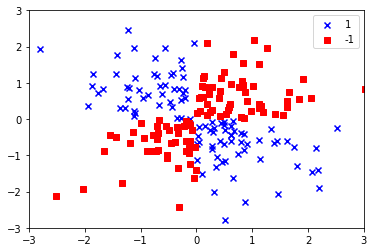

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1 , 0] , X_xor[y_xor == 1 , 1] , c = 'b' , marker = 'x' , label = '1')
plt.scatter(X_xor[y_xor == -1 , 0] , X_xor[y_xor == -1 , 1] , c = 'r' , marker = 's' , label = '-1')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.legend(loc = 'best')
plt.show()

### Data preprocessing section

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X , y , classifier ,test_idx = None , resolution = 0.02):
    #setup marker generator and colormap
    markers = ('s' , 'x' , 'o' , '^' , 'v')
    colors = ('red' , 'blue' , 'lightgreen' , 'gray' , 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surfaces
    x1_min , x1_max = X[: , 0].min() - 1 , X[: , 0].max() + 1
    x2_min , x2_max = X[: , 1].min() - 1 , X[: , 1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min , x1_max , resolution) , 
                            np.arange(x2_min , x2_max , resolution))
    z = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1 , xx2 , z , alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())
    
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl , 0] , y = X[y == cl , 1],
                    alpha = 0.8 , c = colors[idx] , 
                    marker = markers[idx] , label = cl , edgecolor = 'black')

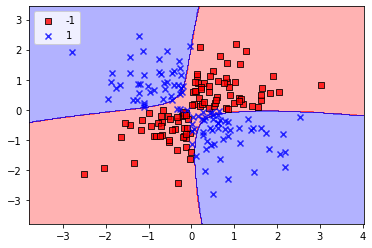

In [3]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf' , random_state = 1 , C = 10.0 , gamma = 0.10)
svm.fit(X_xor , y_xor)
plot_decision_regions(X_xor , y_xor , classifier = svm)
plt.legend(loc = 'upper left')
plt.show()

In [4]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[: , (2 , 3)]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1 , stratify = y )

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
X_combined_std = np.vstack((X_train_std , X_test_std))
y_combined = np.hstack((y_train , y_test))

### Using the kernel trick to find separating hyperplanes in high-dimensional space

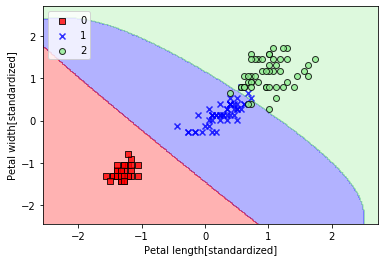

In [8]:
svm = SVC(kernel = 'rbf' , C = 1.0 , gamma = 0.2 , random_state = 1)
svm.fit(X_train_std , y_train)
plot_decision_regions(X_combined_std , y_combined , classifier = svm , test_idx = range(105 , 150))
plt.xlabel('Petal length[standardized]')
plt.ylabel('Petal width[standardized]')
plt.legend(loc = 'upper left')
plt.show()

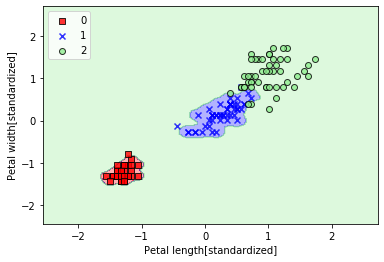

In [9]:
#change the value of gamma and note the difference
svm = SVC(kernel = 'rbf' , C = 1.0 , gamma = 100 , random_state = 1)
svm.fit(X_train_std , y_train)
plot_decision_regions(X_combined_std , y_combined , classifier = svm , test_idx = range(105 , 150))
plt.xlabel('Petal length[standardized]')
plt.ylabel('Petal width[standardized]')
plt.legend(loc = 'upper left')
plt.show()